In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data import

dataset link: https://www.kaggle.com/datasets/kartik2112/fraud-detection?select=fraudTrain.csv

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Data Mining Project/data/fraudTrain.csv')


In [4]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
df.shape

(1296675, 23)

In [6]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

## Data Handling

In [8]:
df.isna().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

No missing data

In [9]:
import warnings
warnings.filterwarnings("ignore")


# EDA

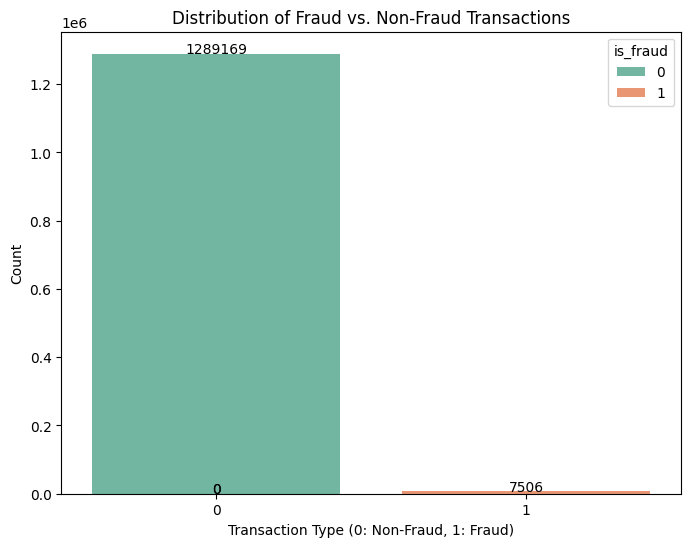

In [10]:
# 1. Distribution of fraud vs. non-fraud transactions
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='is_fraud', data=df,hue='is_fraud', palette='Set2')  # Set palette for different colors
plt.title('Distribution of Fraud vs. Non-Fraud Transactions')
plt.xlabel('Transaction Type (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Count')

# Add values on top of the bars
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.0f}'.format(height),
            ha="center")

plt.show()

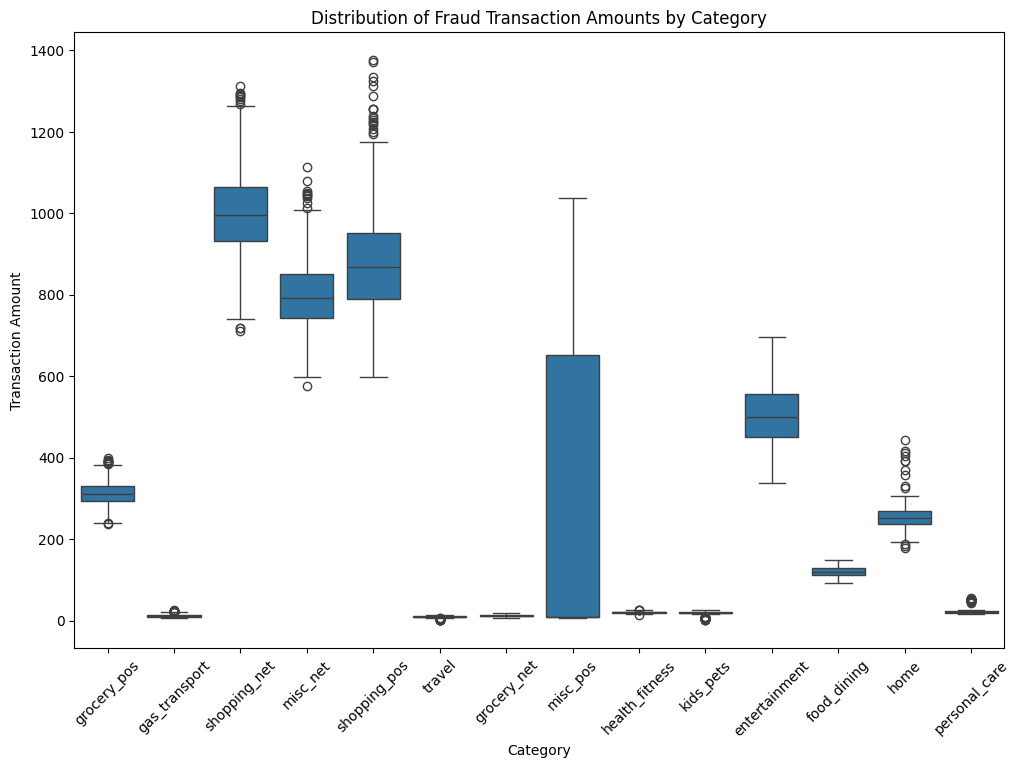

In [11]:
# 2. Distribution of fraud transaction amounts of different categories
# Filter the DataFrame to include only fraudulent transactions
fraud_df = df[df['is_fraud'] == 1]

plt.figure(figsize=(12, 8))
sns.boxplot(x='category', y='amt', data=fraud_df)
plt.title('Distribution of Fraud Transaction Amounts by Category')
plt.xlabel('Category')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=45)
plt.show()

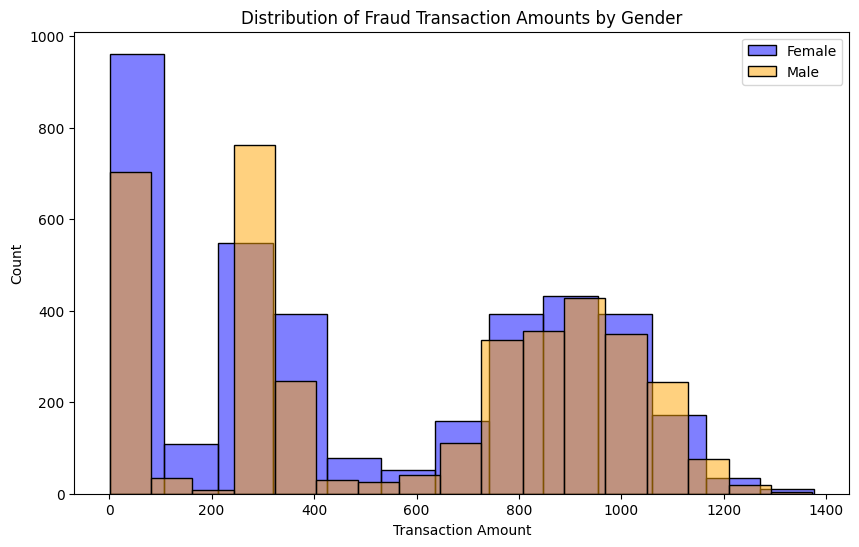

In [12]:
#3.  Distribution of fraud transaction amounts by each gender
plt.figure(figsize=(10, 6))
sns.histplot(fraud_df[fraud_df['gender'] == 'F']['amt'], color='blue', alpha=0.5, label='Female')
sns.histplot(fraud_df[fraud_df['gender'] == 'M']['amt'], color='orange', alpha=0.5, label='Male')
plt.title('Distribution of Fraud Transaction Amounts by Gender')
plt.xlabel('Transaction Amount')
plt.ylabel('Count')
plt.legend()
plt.show()

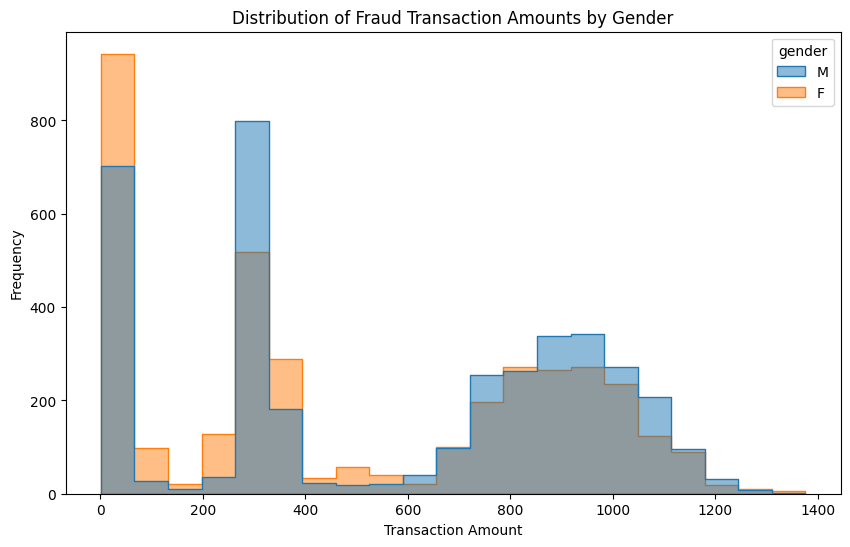

In [13]:
# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=fraud_df, x='amt', hue='gender', color=['orange','blue'],alpha=0.5, element='step', kde=False)

# Adding titles and labels
plt.title('Distribution of Fraud Transaction Amounts by Gender')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')

# Show the plot
plt.show()

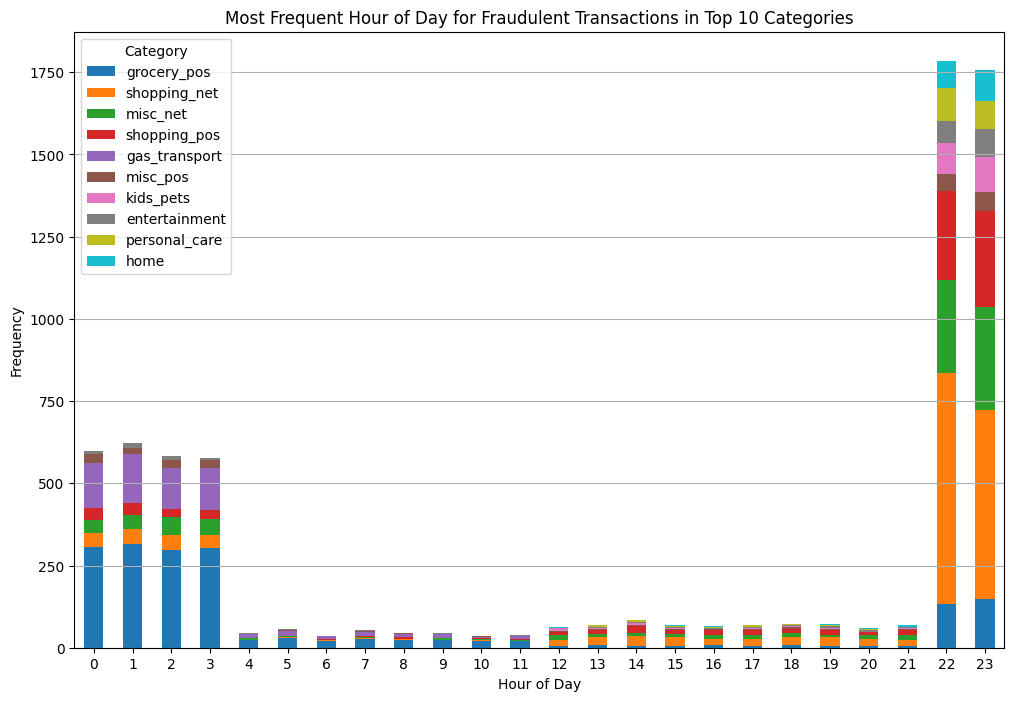

In [14]:
#4.1 Most Frequent Hour of Day for Fraudulent Transactions in Top 10 Categories
# Get the top 10 fraud categories
top_categories = fraud_df['category'].value_counts().head(10).index

# Initialize a DataFrame to store the frequency of each hour for each category
hourly_counts = pd.DataFrame(index=range(24), columns=top_categories)

# Count the occurrences of each hour for each category
for category in top_categories:
    category_df = fraud_df[fraud_df['category'] == category]
    category_df['hour'] = pd.to_datetime(category_df['trans_date_trans_time']).dt.hour
    hourly_count = category_df['hour'].value_counts().sort_index()
    hourly_counts[category] = hourly_count

# Plot stacked bar plot
hourly_counts.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Most Frequent Hour of Day for Fraudulent Transactions in Top 10 Categories')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(title='Category')
plt.grid(axis='y')
plt.show()

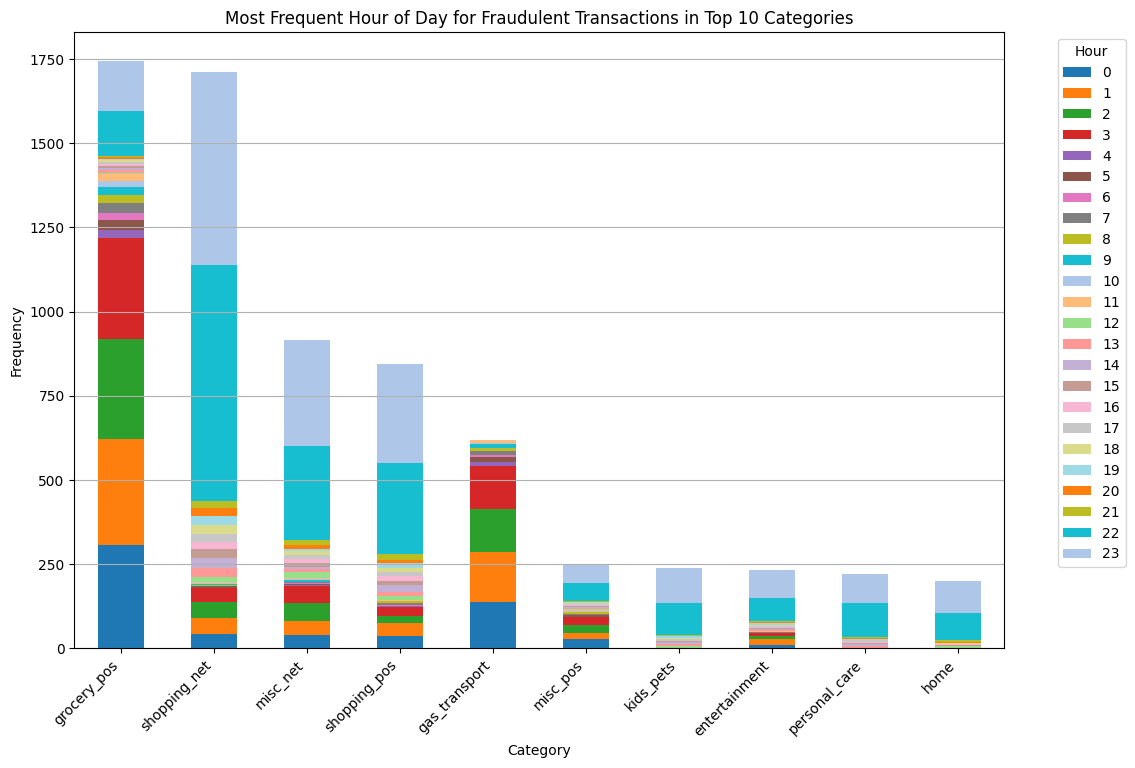

In [15]:
# 4.2 Most Frequent Hour of Day for Fraudulent Transactions in Top 10 Categories
# Get the top 10 fraud categories
top_categories = fraud_df['category'].value_counts().head(10).index

# Initialize a DataFrame to store the frequency of each hour for each category
hourly_counts = pd.DataFrame(index=range(24), columns=top_categories)

# Define a custom color palette for 24 hours
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
                 '#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5', '#c49c94', '#f7b6d2', '#c7c7c7', '#dbdb8d', '#9edae5',
                 '#ff7f0e', '#bcbd22', '#17becf', '#aec7e8']

# Count the occurrences of each hour for each category
for category in top_categories:
    category_df = fraud_df[fraud_df['category'] == category]
    category_df['hour'] = pd.to_datetime(category_df['trans_date_trans_time']).dt.hour
    hourly_count = category_df['hour'].value_counts().sort_index()
    hourly_counts[category] = hourly_count

# Transpose the DataFrame
hourly_counts = hourly_counts.transpose()

# Plot stacked bar plot
hourly_counts.plot(kind='bar', stacked=True, figsize=(12, 8), color=colors)
plt.title('Most Frequent Hour of Day for Fraudulent Transactions in Top 10 Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Hour', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.show()

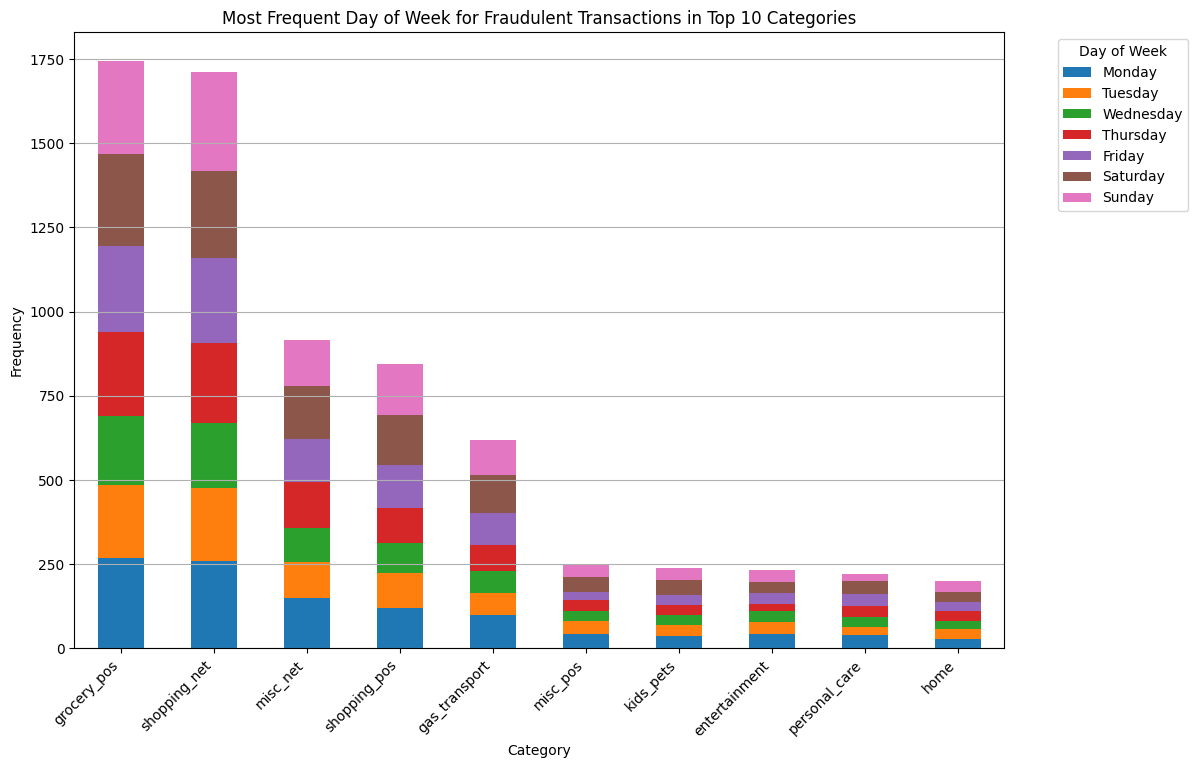

In [16]:
# 5 Most Frequent Day of Week for Fraudulent Transactions in Top 10 Categories
# Get the top 10 fraud categories
top_categories = fraud_df['category'].value_counts().head(10).index

# Initialize a DataFrame to store the frequency of each day of the week for each category
daily_counts = pd.DataFrame(index=range(7), columns=top_categories)

# Count the occurrences of each day of the week for each category
for category in top_categories:
    category_df = fraud_df[fraud_df['category'] == category]
    category_df['day_of_week'] = pd.to_datetime(category_df['trans_date_trans_time']).dt.dayofweek
    daily_count = category_df['day_of_week'].value_counts().sort_index()
    daily_counts[category] = daily_count

# Transpose the DataFrame
daily_counts = daily_counts.transpose()

# Plot stacked bar plot
daily_counts.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Most Frequent Day of Week for Fraudulent Transactions in Top 10 Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.legend(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], title='Day of Week', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.show()

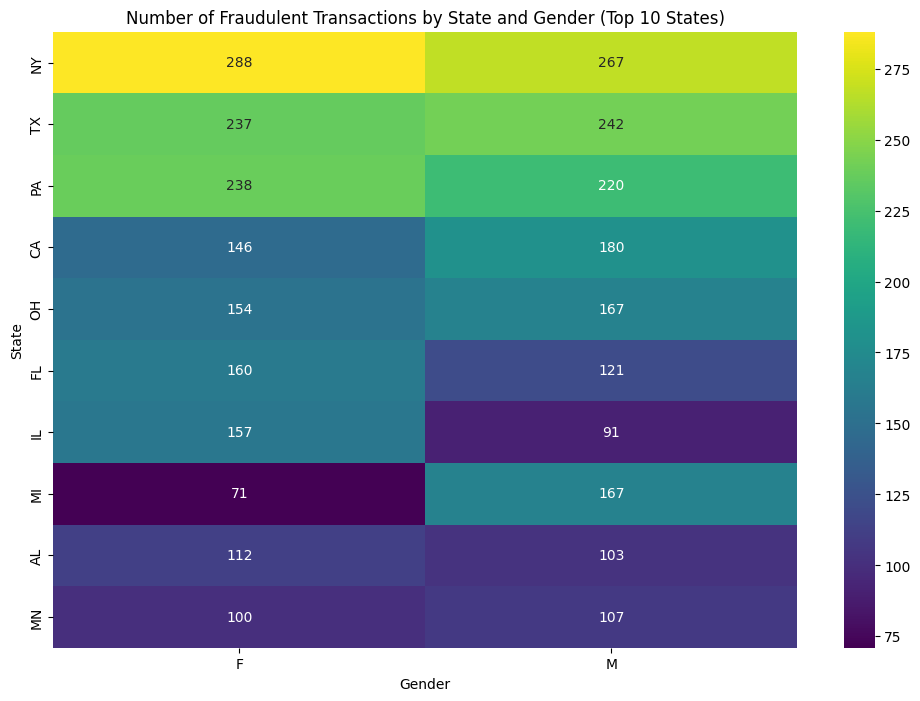

In [17]:
#6. Number of Fraudulent Transactions by State and Gender (Top 10 States)
# Count the number of fraudulent transactions in each state by each gender
state_gender_counts = fraud_df.groupby(['state', 'gender']).size().unstack(fill_value=0)

# Get the top 10 fraudulent states
top_states = fraud_df['state'].value_counts().head(10).index

# Filter state_gender_counts to include only the top 10 fraudulent states
state_gender_counts_top10 = state_gender_counts.loc[top_states]

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(state_gender_counts_top10, cmap='viridis', annot=True, fmt='d', cbar=True)
plt.title('Number of Fraudulent Transactions by State and Gender (Top 10 States)')
plt.xlabel('Gender')
plt.ylabel('State')
plt.show()

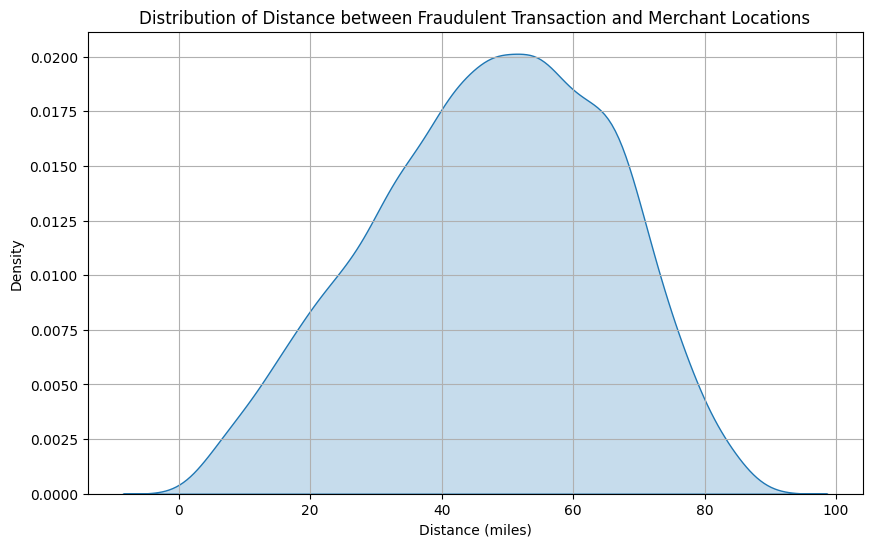

In [18]:
# 7. Distribution of Distance between Fraudulent Transaction and Merchant Locations
from geopy.distance import geodesic

# Calculate the distance between fraudulent transaction and merchant locations
fraud_df['distance'] = fraud_df.apply(lambda row: geodesic((row['lat'], row['long']), (row['merch_lat'], row['merch_long'])).miles, axis=1)

# Plot the distribution of distances using a KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(fraud_df['distance'], shade=True)
plt.title('Distribution of Distance between Fraudulent Transaction and Merchant Locations')
plt.xlabel('Distance (miles)')
plt.ylabel('Density')
plt.grid(True)
plt.show()